In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
sp.init_printing(use_unicode=True)
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 7)

q1 = sp.Symbol('q_1')
q2 = sp.Symbol('q_2')
d = sp.Symbol('d')
n = sp.Symbol('n')
n1 = sp.Symbol('n1')
n2 = sp.Symbol('n2')
n3 = sp.Symbol('n3')
kp = sp.Symbol('kp')
k0 = sp.Symbol('k0')

Populating the interactive namespace from numpy and matplotlib


In [2]:
m11 = (1+q2/q1)*sp.exp(-sp.I*q1*d)
m12 = (1-q2/q1)*sp.exp(-sp.I*q1*d)
m21 = (1-q2/q1)*sp.exp(sp.I*q1*d)
m22 = (1+q2/q1)*sp.exp(sp.I*q1*d)
M = sp.Matrix([[m11,m12],[m21,m22]])
q = k0*(n**2-kp**2/k0**2)**(1/2)

In [3]:
M0 = (M.subs([(q1,q.subs(n,n1)),(q2,q.subs(n,n2)), (d , 0)]))
M1 = (M.subs([(q1,q.subs(n,n2)),(q2,q.subs(n,n3)), (d , 1)]))
M_n = M0*M1
f = sp.lambdify((n1,n2,n3, kp, k0), M_n[0,0], "numpy")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in power
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:2761: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


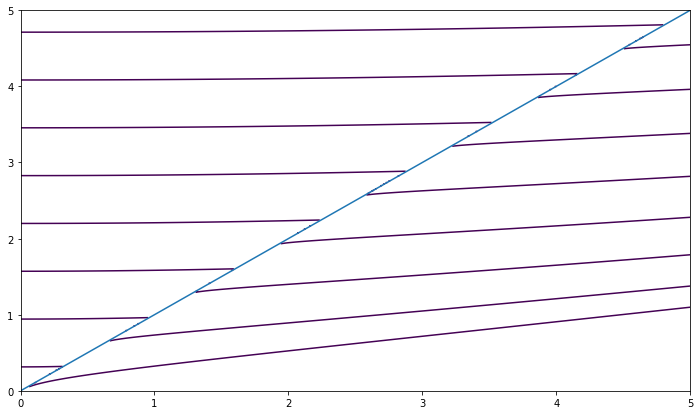

In [4]:
n_1= 1
n_2 = 5
n_3 = 1
num_point = 500
k1 = np.linspace(0,5, num_point)+0j
k2 = np.linspace(0,5, num_point)+0j
k_p, k_0 = np.meshgrid(k1,k2)
f3 = f(n_1,n_2, n_3, k_p,k_0)
plt.contour(k_p, k_0, f3, [0])
plt.plot(k2,k2)
plt.show()